In [3]:
import sys
sys.path.append("../lib")
from pathlib import Path
import input_output_func as in_out
path_to_data=Path("../data")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#### A-Подсчет количества ребер неориентированного графа
Простой неориентированный граф задан матрицей смежности. Найдите количество ребер в графе.

Формат входных данных
На вход программы поступает число n ( 1 <= n <= 100) – количество вершин в графе, а затем n строк по n чисел, каждое из которых равно 0 или 1, – его матрица смежности.

Формат выходных данных
Выведите одно число – количество ребер заданного графа.

In [6]:
text="""5
0 1 0 0 0
1 0 1 0 0
0 1 0 0 1
0 0 0 0 0
0 0 1 0 0"""
path=path_to_data.joinpath("graph/A.txt")
in_out.write_to_file(text,path)
adj_matrix=in_out.input_numbers(n_type=int,first_is_str_count=True,file_name=str(path))


file A.txt is written


In [9]:
def count_edges(read_line):
    n=int(read_line())
    m=0
    for i in range(n):
        m+=sum(map(int,read_line().split()))
    return (m//2)
with path.open('r') as f:
    print(count_edges(f.readline))

3


3


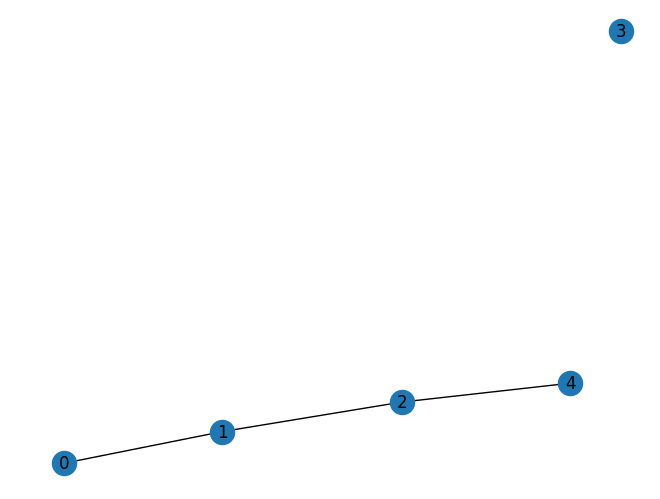

In [10]:
G=nx.Graph(np.matrix(adj_matrix))
nx.draw(G,with_labels=True)
print(G.number_of_edges())
plt.show()

#### B-Проверка матрицы смежности

По заданной квадратной матрице n×n из нулей и единиц определите, может ли данная матрица быть матрицей смежности простого неориентированного графа.

Формат входных данных
На вход программы поступает число n ( 1 <= n <= 100) – размер матрицы, а затем n строк по n чисел, каждое из которых равно 0 или 1, – сама матрица.

Формат выходных данных
Выведите «YES», если приведенная матрица может быть матрицей смежности простого неориентированного графа, и «NO» в противном случае.



In [11]:
def is_graph_simple_not_directed(adj_matrix,n):   
    for i in range(n):
        if adj_matrix[i][i]==1:
            return False
        for j in range(n//2+1):
            if adj_matrix[i][j]!=adj_matrix[j][i]:
                return False
    return True

n=int(input())
adj_matrix=[0]*n
for i in range(n):
    adj_matrix[i]=tuple(map(int,input().split()))
    
print("YES" if is_graph_simple_not_directed(adj_matrix,n) else "NO")

3
1 0 1
0 0 0
1 0 0
NO


NO


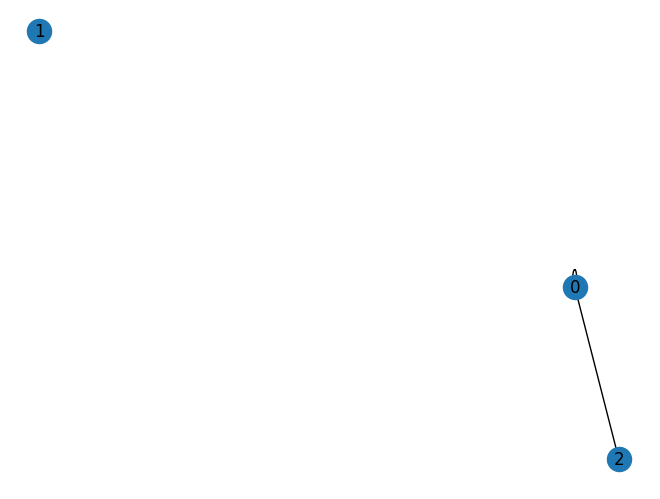

In [13]:
#adj_matrix=np.array([[random.randrange(2) for j in range(n)] for i in range(n)])
G=nx.Graph(np.array(adj_matrix))
nx.draw(G,with_labels=True)
print("Yes" if not( G.is_directed() or nx.number_of_selfloops(G)) else "NO")
plt.show()

### C-Разноцветные холмы

В Банановой республике очень много холмов, соединенных мостами. На химическом заводе произошла авария, в результате чего испарилось экспериментальное удобрение "зован". На следующий день выпал цветной дождь, причем он прошел только над холмами. В некоторых местах падали красные капли, в некоторых – синие, а в остальных – зеленые, в результате чего холмы стали соответствующего цвета. Президенту Банановой республики это понравилось, но ему захотелось покрасить мосты между вершинами холмов так, чтобы мосты были покрашены в цвет холмов, которые они соединяют. К сожалению, если холмы разного цвета, то покрасить мост таким образом не удастся. Посчитайте количество таких "плохих" мостов.

Формат входных данных
В первой строке входных данных содержится число N (0 < N ≤ 100) – количество холмов. Далее идет матрица смежности, описывающая наличие мостов между холмами (1 – мост есть, 0 – нет). После матрицы смежности идёт пустая строка , и в последней строке записано N чисел, обозначающих цвет холмов: 1 – красный; 2 – синий; 3 – зеленый.

Формат выходных данных
Выведите одно число – количество "плохих" мостов.

Примеры
-> 7 -> 0 1 0 0 0 1 1 -> 1 0 1 0 0 0 0 -> 0 1 0 0 1 1 0 -> 0 0 0 0 0 0 0 -> 0 0 1 0 0 1 0 -> 1 0 1 0 1 0 0 -> 1 0 0 0 0 0 0 -> -> 1 1 1 1 1 3 3 -- <- 4

In [31]:
text="7 -> 0 1 0 0 0 1 1 -> 1 0 1 0 0 0 0 -> 0 1 0 0 1 1 0 -> 0 0 0 0 0 0 0 -> 0 0 1 0 0 1 0 -> 1 0 1 0 1 0 0 -> 1 0 0 0 0 0 0 ->  -> 1 1 1 1 1 3 3"
text=text.replace(" -> ","\n")
path=path_to_data.joinpath("graph/C.txt")
in_out.write_to_file(text,path)

file C.txt exists


In [33]:
def get_data(read_line):
    hills_number=int(read_line())
    banana_map=get_banana_map(hills_number,read_line)
    read_line()
    hill_colors=dict(enumerate(read_line().split()))
    return banana_map,hill_colors
    
def get_banana_map(hills_number,read_line):
    banana_map={}
    for hill in range(hills_number):
        s=read_line()
        neighbours_hills=set()
        for hill_id,is_bridge in enumerate(s.split()):
            if is_bridge=="1":
                neighbours_hills.add(hill_id)
        banana_map[hill]=neighbours_hills
    return banana_map

def count_bad_bridges(banana_map,hill_colors):
    bad_bridges_count=0
    for hill,neighbours_hills in banana_map.items():
        for nb_hill in neighbours_hills:
            if hill_colors[hill]!=hill_colors[nb_hill]:
                bad_bridges_count+=1
    return bad_bridges_count//2

with path.open('r') as f:
    banana_map,hill_colors=get_data(f.readline)
bad_bridges=count_bad_bridges(banana_map,hill_colors)
print(bad_bridges)

4


Bad bridges: 4


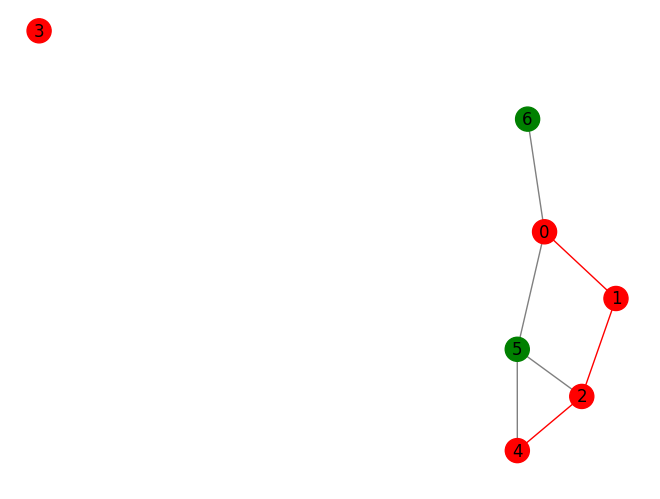

In [34]:
matrix=in_out.input_numbers(n_type=int,first_is_str_count=True,file_name=str(path))
G=nx.Graph(np.array(matrix))

colors_str="1 1 1 1 1 3 3"
colors_dict={1:"red",2:"blue", 3:"green",0:"grey"}
node_colors=[int(i) for i in colors_str.split()]
edge_colors=[]
nx.set_node_attributes(G,dict(enumerate(node_colors)),name="color")
G.edges.data("color",0)

non_colored_edges=0
for node1,node2 in G.edges():
    if G.nodes[node1]["color"]==G.nodes[node2]["color"]:
        G[node1][node2]["color"]=G.nodes[node1]["color"]
    else:
        G[node1][node2]["color"]=0
        non_colored_edges+=1
    edge_colors.append(G[node1][node2]['color'])
node_colors=[colors_dict[i] for i in node_colors]
edge_colors=[colors_dict[i] for i in edge_colors]
nx.draw(G,with_labels=True,node_color=node_colors,edge_color=edge_colors)
print("Bad bridges:",non_colored_edges)
plt.show()

Сдать решение задачи D-Полуполный граф

Ориентированный граф называется полуполным, если между любой парой его различных вершин есть хотя бы одно ребро. Для заданного списком ребер графа проверьте, является ли он полуполным.

Формат входных данных
Сначала вводятся числа n ( 1 <= n <= 100) – количество вершин в графе и m ( 1 <= m <= n(n - 1)) – количество ребер. Затем следует m пар чисел – ребра графа. Номера вершин начинаются с 0.

Формат выходных данных
Выведите «YES», если граф является полуполным, и «NO» в противном случае.

Примеры
Ввод	Вывод
2 1
1 0
YES


In [35]:
def get_graph(edge_number):
    graph={}
    for _ in range(edge_number):
        v,u = map(int,input().split())
        if v in graph:
            graph[v].add(u)
        else:
            graph[v]={u}
    return graph

def is_semicomplete(graph,v_number):
    for v in range(v_number):
        for u in range(v_number//2):
            if v==u:continue
            if not(v in graph and u in graph[v] or(u in graph and v in graph[u])):
              return False
    return True

n,m=map(int,input().split())
print("YES" if is_semicomplete(get_graph(m),n) else "NO")

2 1
1 0
YES
